In [77]:
import pandas as pd

In [78]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [79]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [80]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
extracurricular_activities_values = {"Yes": 1, "No": 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(extracurricular_activities_values)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [83]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [84]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

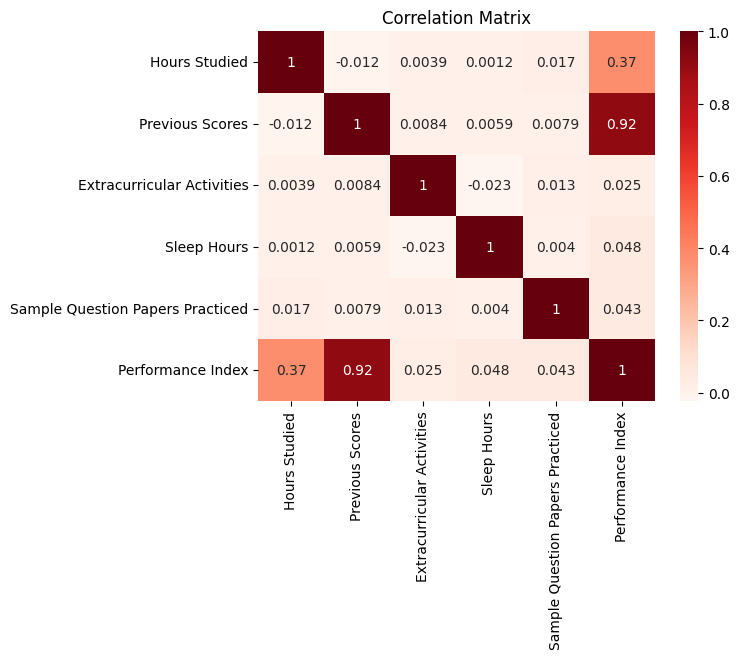

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

Text(0, 0.5, 'Performance Index')

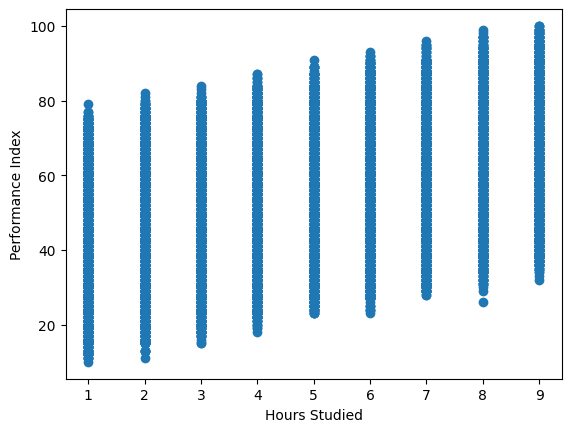

In [86]:
plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')

Text(0, 0.5, 'Performance Index')

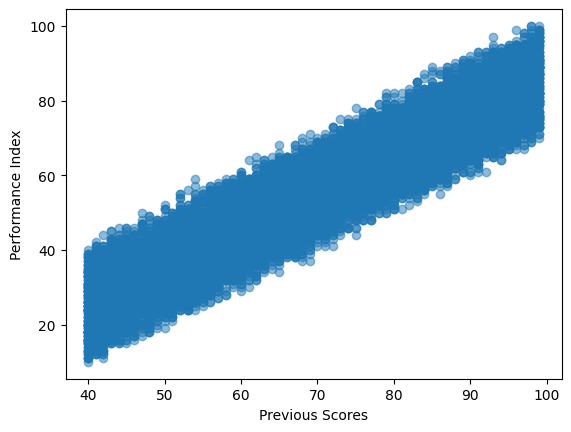

In [87]:
plt.scatter(df['Previous Scores'], df['Performance Index'], alpha=0.5)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

In [88]:
import numpy as np

def rmse(target, predicted):
    return np.sqrt(np.mean(np.square(target - predicted)))

In [89]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
inputs = df.drop(['Performance Index'], axis=1)
target = df['Performance Index']

print(inputs.shape)
print(target.shape)

(10000, 5)
(10000,)


In [90]:
model.fit(inputs, target)

LinearRegression()

In [91]:
predictions = model.predict(inputs)
predictions

array([91.85200884, 63.15778719, 45.05283229, ..., 72.99872851,
       94.36618291, 65.29769669])

In [92]:
rmse(target=target, predicted=predictions)

2.037486351842887

In [93]:
w = model.coef_
c = model.intercept_

print(w)
print(c)

[2.85298205 1.01843419 0.61289758 0.48055975 0.19380214]
-34.075588091913275


In [94]:
hours_studied = 9
previous_scores = 70
extracurricular_activities = 1
sleep_hours = 9
sample_question_paper_practiced = 9

student = [[hours_studied, previous_scores, extracurricular_activities, sleep_hours, sample_question_paper_practiced]]
performance_index =  model.predict(student)
performance_index

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.57379849])